In [ ]:
# prompt: 판다스로 같은 경로에 있는 csv 파일을 찾아서 가장 위의 것 하나만 데이터프레임 df변수로 가져올 것

import pandas as pd
import glob
import os

# 현재 디렉토리의 모든 CSV 파일 목록 가져오기
csv_files = glob.glob(os.path.join(os.getcwd(), "*.csv"))

if csv_files:
    # 가장 위의 CSV 파일 경로 가져오기 (정렬 후 첫 번째 파일)
    first_csv_file = sorted(csv_files)[0]

    try:
        # CSV 파일을 Pandas DataFrame으로 읽어오기
        df = pd.read_csv(first_csv_file)
        print(f"Loaded DataFrame from: {first_csv_file}")
        print(df.head()) # 첫 5행 출력
    except pd.errors.EmptyDataError:
        print(f"Error: The file '{first_csv_file}' is empty.")
    except pd.errors.ParserError:
        print(f"Error: Could not parse the file '{first_csv_file}'. Check the file format.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
else:
    print("No CSV files found in the current directory.")

Loaded DataFrame from: /content/related_keywords_with_contents.csv
    Keyword                                      Related Title  \
0  Flow툴 기능  Slack 슬랙, <b>Flow</b> 플로우 업무 효율을 높이는 협업<b>툴 기능...   
1  Flow툴 기능    생성형 AI 비서 적용 협업툴 플로우 <b>flow</b> 3.0 AI NOW...    
2  Flow툴 기능         업무관리 AI 프로그램 협업툴, 인공지능 비서 플로우(<b>Flow</b>)   
3  Flow툴 기능                          협업툴 지라, <b>FLOW</b> 비교 분석   
4  Flow툴 기능       협업툴 플로우 <b>FLOW</b>, 업무 효율 생산성 향상 AI 프로그램 추천   

                                     Content Summary  
0  그런 점에서 오늘은 슬랙(Slack)과 플로우(<b>Flow</b>)라는 협업툴을 ...  
1  지난 3월 7일(목) 여의도의 콘래드 호텔에서 개최되었던 <b>flow</b> 3....  
2  오늘은 업무관리에 필요한 ai 협업툴인 플로우(<b>Flow</b>)에 대해 알아보...  
3  오늘은 협업툴 지라와 <b>FLOW</b>를 비교하는 컨텐츠를 포스팅하겠습니다. 개...  
4  그래서 그동안 여러 협업툴을 정말 많이 사용해 왔지만, 제가 사용한 플로우(<b>F...  


In [ ]:
# prompt: Related Title과 Content Summary를 합쳐서 하나의 문서를 만들어 주세요!

df['Combined Text'] = df['Related Title'].astype(str) + ' ' + df['Content Summary'].astype(str)

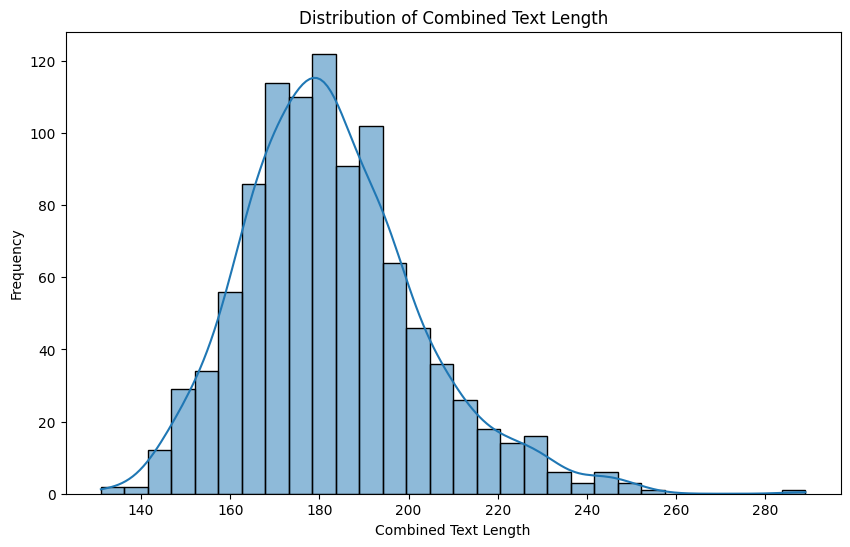

count    1000.000000
mean      182.879000
std        20.042706
min       131.000000
25%       169.000000
50%       181.000000
75%       194.000000
max       289.000000
Name: Combined Text Length, dtype: float64


In [ ]:
# prompt: Combined Text 컬럼의 길이를 구하고 시각화

import matplotlib.pyplot as plt
import seaborn as sns

# Combined Text 길이 계산
df['Combined Text Length'] = df['Combined Text'].str.len()

# Combined Text 길이 분포 시각화 (히스토그램)
plt.figure(figsize=(10, 6))
sns.histplot(df['Combined Text Length'], bins=30, kde=True)  # kde=True: 밀도 곡선 추가
plt.title('Distribution of Combined Text Length')
plt.xlabel('Combined Text Length')
plt.ylabel('Frequency')
plt.show()

# Combined Text 길이 통계 정보 출력
print(df['Combined Text Length'].describe())

Loaded DataFrame from: /content/related_keywords_with_contents.csv
    Keyword                                      Related Title  \
0  Flow툴 기능  Slack 슬랙, <b>Flow</b> 플로우 업무 효율을 높이는 협업<b>툴 기능...   
1  Flow툴 기능    생성형 AI 비서 적용 협업툴 플로우 <b>flow</b> 3.0 AI NOW...    
2  Flow툴 기능         업무관리 AI 프로그램 협업툴, 인공지능 비서 플로우(<b>Flow</b>)   
3  Flow툴 기능                          협업툴 지라, <b>FLOW</b> 비교 분석   
4  Flow툴 기능       협업툴 플로우 <b>FLOW</b>, 업무 효율 생산성 향상 AI 프로그램 추천   

                                     Content Summary  
0  그런 점에서 오늘은 슬랙(Slack)과 플로우(<b>Flow</b>)라는 협업툴을 ...  
1  지난 3월 7일(목) 여의도의 콘래드 호텔에서 개최되었던 <b>flow</b> 3....  
2  오늘은 업무관리에 필요한 ai 협업툴인 플로우(<b>Flow</b>)에 대해 알아보...  
3  오늘은 협업툴 지라와 <b>FLOW</b>를 비교하는 컨텐츠를 포스팅하겠습니다. 개...  
4  그래서 그동안 여러 협업툴을 정말 많이 사용해 왔지만, 제가 사용한 플로우(<b>F...  


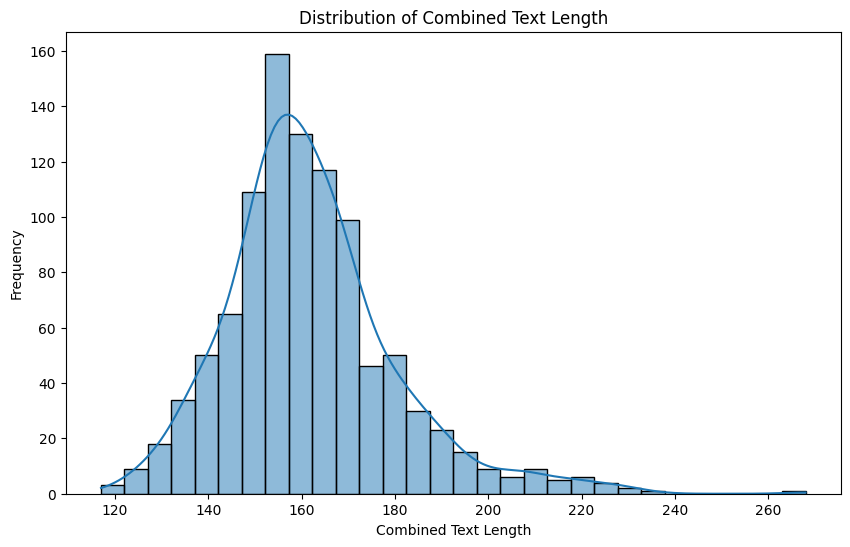

count    1000.000000
mean      161.865000
std        18.157711
min       117.000000
25%       151.000000
50%       159.000000
75%       170.000000
max       268.000000
Name: Combined Text Length, dtype: float64


In [ ]:
# prompt: df['Combined Text']에서 html 제거

import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
import re

# 현재 디렉토리의 모든 CSV 파일 목록 가져오기
csv_files = glob.glob(os.path.join(os.getcwd(), "*.csv"))

if csv_files:
    # 가장 위의 CSV 파일 경로 가져오기 (정렬 후 첫 번째 파일)
    first_csv_file = sorted(csv_files)[0]

    try:
        # CSV 파일을 Pandas DataFrame으로 읽어오기
        df = pd.read_csv(first_csv_file)
        print(f"Loaded DataFrame from: {first_csv_file}")
        print(df.head()) # 첫 5행 출력
    except pd.errors.EmptyDataError:
        print(f"Error: The file '{first_csv_file}' is empty.")
    except pd.errors.ParserError:
        print(f"Error: Could not parse the file '{first_csv_file}'. Check the file format.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
else:
    print("No CSV files found in the current directory.")

df['Combined Text'] = df['Related Title'].astype(str) + ' ' + df['Content Summary'].astype(str)

# HTML 태그 제거
def remove_html_tags(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

df['Combined Text'] = df['Combined Text'].apply(remove_html_tags)


# Combined Text 길이 계산
df['Combined Text Length'] = df['Combined Text'].str.len()

# Combined Text 길이 분포 시각화 (히스토그램)
plt.figure(figsize=(10, 6))
sns.histplot(df['Combined Text Length'], bins=30, kde=True)  # kde=True: 밀도 곡선 추가
plt.title('Distribution of Combined Text Length')
plt.xlabel('Combined Text Length')
plt.ylabel('Frequency')
plt.show()

# Combined Text 길이 통계 정보 출력
print(df['Combined Text Length'].describe())

In [ ]:
df

,Keyword,Related Title,Content Summary,Combined Text,Combined Text Length
0,Flow툴 기능,"Slack 슬랙, <b>Flow</b> 플로우 업무 효율을 높이는 협업<b>툴 기능...",그런 점에서 오늘은 슬랙(Slack)과 플로우(<b>Flow</b>)라는 협업툴을 ...,"Slack 슬랙, Flow 플로우 업무 효율을 높이는 협업툴 기능 그런 점에서 오늘...",159
1,Flow툴 기능,생성형 AI 비서 적용 협업툴 플로우 <b>flow</b> 3.0 AI NOW...,지난 3월 7일(목) 여의도의 콘래드 호텔에서 개최되었던 <b>flow</b> 3....,생성형 AI 비서 적용 협업툴 플로우 flow 3.0 AI NOW... 지난 3월...,168
2,Flow툴 기능,"업무관리 AI 프로그램 협업툴, 인공지능 비서 플로우(<b>Flow</b>)",오늘은 업무관리에 필요한 ai 협업툴인 플로우(<b>Flow</b>)에 대해 알아보...,"업무관리 AI 프로그램 협업툴, 인공지능 비서 플로우(Flow) 오늘은 업무관리에 ...",153
3,Flow툴 기능,"협업툴 지라, <b>FLOW</b> 비교 분석",오늘은 협업툴 지라와 <b>FLOW</b>를 비교하는 컨텐츠를 포스팅하겠습니다. 개...,"협업툴 지라, FLOW 비교 분석 오늘은 협업툴 지라와 FLOW를 비교하는 컨텐츠를...",138
4,Flow툴 기능,"협업툴 플로우 <b>FLOW</b>, 업무 효율 생산성 향상 AI 프로그램 추천","그래서 그동안 여러 협업툴을 정말 많이 사용해 왔지만, 제가 사용한 플로우(<b>F...","협업툴 플로우 FLOW, 업무 효율 생산성 향상 AI 프로그램 추천 그래서 그동안 ...",158
...,...,...,...,...,...
995,Flow툴 기능,애자일 조직의 시작 - 노션(notion)템플릿과 플로우 활용하기,"두번째는 플로우(<b>flow</b>)입니다. 이 두가지 서비스를 쓰면서, 업무 관...",애자일 조직의 시작 - 노션(notion)템플릿과 플로우 활용하기 두번째는 플로우(...,177
996,Flow툴 기능,7월 8일,selection tool &lt; V &gt; : 선택/이동 <b>툴</b> ( ...,7월 8일 selection tool &lt; V &gt; : 선택/이동 툴 ( h...,174
997,Flow툴 기능,발멧플로우컨트롤 밸브 기술의 발전,Ville Kähkönen (Director) Renewable Energy and...,발멧플로우컨트롤 밸브 기술의 발전 Ville Kähkönen (Director) R...,213
998,Flow툴 기능,&quot;나만의 개발 생산성 높이는 비법&quot;,예시 Git <b>Flow</b> 전략: 저는 팀 프로젝트에서 Git <b>Flow...,&quot;나만의 개발 생산성 높이는 비법&quot; 예시 Git Flow 전략: ...,169


In [ ]:
# prompt: df['Combined Text']를 TF-IDF로 5개의 주제로 NMF로 토픽모델링하고 각 주요 키워드와 가중치 20개씩 추출

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
import pandas as pd
import numpy as np

# TF-IDF 벡터화
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = vectorizer.fit_transform(df['Combined Text'])

# NMF 모델 학습 (5개 주제)
nmf_model = NMF(n_components=5, random_state=42)
nmf_model.fit(tfidf)

# 주제별 키워드 및 가중치 추출
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(nmf_model.components_):
    print(f"Topic #{topic_idx + 1}:")
    top_keywords_indices = topic.argsort()[:-21:-1]  # 상위 20개 키워드 인덱스
    top_keywords = [(feature_names[i], topic[i]) for i in top_keywords_indices]
    for keyword, weight in top_keywords:
        print(f"  - {keyword}: {weight:.3f}")
    print()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic #1:
  - 플로우: 1.242
  - 협업툴: 0.983
  - 업무: 0.532
  - 프로젝트: 0.481
  - flow: 0.472
  - 메신저: 0.379
  - 관리: 0.355
  - 협업: 0.326
  - 올인원: 0.252
  - 업무용: 0.249
  - 플로우는: 0.244
  - 업무관리: 0.242
  - 국내: 0.208
  - 기능이: 0.200
  - 슬랙: 0.198
  - 화상회의: 0.187
  - 있는: 0.180
  - 기능: 0.170
  - 연동: 0.153
  - slack: 0.153

Topic #2:
  - 기능: 0.635
  - flow: 0.605
  - quot: 0.576
  - git: 0.356
  - 기능을: 0.337
  - chart: 0.260
  - 위한: 0.237
  - 있는: 0.236
  - 디자인: 0.235
  - 다양한: 0.225
  - gt: 0.199
  - design: 0.184
  - 쉽게: 0.180
  - 설계: 0.179
  - ui: 0.169
  - 분석: 0.164
  - work: 0.163
  - user: 0.161
  - flow로: 0.159
  - 대한: 0.159

Topic #3:
  - ai: 1.468
  - 생성형: 0.304
  - 업무: 0.271
  - 기능을: 0.182
  - flow: 0.145
  - 비서: 0.135
  - 기반: 0.131
  - ai를: 0.121
  - 협업: 0.118
  - 통해: 0.116
  - 플로우: 0.111
  - 템플릿: 0.106
  - 인공지능: 0.101
  - 6가지: 0.092
  - 협업툴: 0.089
  - 스마트: 0.085
  - 사용: 0.084
  - 7일: 0.083
  - 최초: 0.082
  - 있습니다: 0.082

Topic #4:
  - 포토샵: 0.619
  - 브러시: 0.617
  - tool: 0.585
  - brush: 0.577

In [ ]:
# prompt: 전체 TF-IDF 키워드에서 합계가 높은 키워드 상위 50개 추출

# TF-IDF 키워드 합계 계산 및 상위 50개 추출
keyword_sums = {}
for topic_idx, topic in enumerate(nmf_model.components_):
    top_keywords_indices = topic.argsort()[:-21:-1]
    top_keywords = [(feature_names[i], topic[i]) for i in top_keywords_indices]
    for keyword, weight in top_keywords:
        keyword_sums[keyword] = keyword_sums.get(keyword, 0) + weight

sorted_keywords = sorted(keyword_sums.items(), key=lambda item: item[1], reverse=True)
top_50_keywords = sorted_keywords[:50]

print("Top 50 Keywords by Sum of TF-IDF Weights:")
for keyword, weight_sum in top_50_keywords:
    print(f"- {keyword}: {weight_sum:.3f}")

Top 50 Keywords by Sum of TF-IDF Weights:
- flow: 1.532
- ai: 1.468
- 플로우: 1.353
- 협업툴: 1.073
- 기능: 0.805
- 업무: 0.803
- 기능을: 0.685
- 로지텍: 0.641
- 포토샵: 0.619
- 브러시: 0.617
- 있는: 0.613
- tool: 0.585
- brush: 0.577
- quot: 0.576
- 브러쉬: 0.521
- 프로젝트: 0.481
- mx: 0.469
- 협업: 0.445
- 마우스: 0.399
- 메신저: 0.379
- git: 0.356
- 관리: 0.355
- 생성형: 0.304
- opacity: 0.297
- 브러시의: 0.280
- 에어브러시: 0.262
- chart: 0.260
- 버티컬: 0.257
- 올인원: 0.252
- 업무용: 0.249
- 플로우는: 0.244
- 업무관리: 0.242
- 툴의: 0.240
- 위한: 0.237
- 디자인: 0.235
- 조절하는: 0.234
- 100: 0.227
- 다양한: 0.225
- 조절: 0.217
- 옵션: 0.210
- 국내: 0.208
- 지우개: 0.208
- 기능이: 0.200
- gt: 0.199
- 슬랙: 0.198
- 수치가: 0.195
- pc를: 0.192
- 화상회의: 0.187
- 사용할: 0.186
- design: 0.184


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# prompt: 문서에서 로지텍 관련된 내용만 모두 찾을 것

import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
import numpy as np

# ... (previous code)

# 로지텍 관련 내용 찾기 (Combined Text 열에서 "로지텍" 포함된 행 추출)
logitech_related_df = df[df['Combined Text'].str.contains('로지텍', na=False, case=False)]

# 결과 출력
print("\n로지텍 관련 내용:")
logitech_related_df

# ... (rest of the code)


로지텍 관련 내용:


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Keyword,Related Title,Content Summary,Combined Text,Combined Text Length
153,Flow툴 기능,손목이 편안한 인체공학 버티컬 마우스 추천 로지텍 LIFT 실...,로지텍 <b>FLOW</b> <b>기능</b>을 활용하면 3대의 기기를 하나의 디바...,손목이 편안한 인체공학 버티컬 마우스 추천 로지텍 LIFT 실... 로지텍 FLO...,163
253,Flow툴 기능,손목이 아프다면 로지텍 버티컬 마우스 MX Vertical을...,있는 <b>FLOW</b> <b>기능</b>은 업무를 볼 때 극한의 효율성을 보여줍...,손목이 아프다면 로지텍 버티컬 마우스 MX Vertical을... 있는 FLOW ...,165
301,Flow툴 기능,왼손잡이를 위한 로지텍 LIFT LEFT 인체공학 버티컬 마우스...,또 다른 편의 <b>기능</b>으로는 플로우(<b>FLOW</b>)가 있습니다. 전...,왼손잡이를 위한 로지텍 LIFT LEFT 인체공학 버티컬 마우스... 또 다른 편...,170
357,Flow툴 기능,블루투스 마우스 추천 맥 전용도 로지텍 MX Anywhere 3,로지텍 <b>FLOW</b> <b>기능</b>은 로지텍 Options 소프트웨어를 ...,블루투스 마우스 추천 맥 전용도 로지텍 MX Anywhere 3 로지텍 FLOW 기...,160
414,Flow툴 기능,로지텍 MX Keys Mini 가벼운 무선 키보드를 원한다면,또한 <b>FLOW</b> <b>기능</b>이 탑재 된 마우스와 함께 사용한다면 커...,로지텍 MX Keys Mini 가벼운 무선 키보드를 원한다면 또한 FLOW 기능이 ...,163
436,Flow툴 기능,"충격적인 로지텍 마우스 A/S 후기, MX MASTER 2S",로지텍에서 보내준 것이 <b>Flow</b> <b>기능</b>이 있는 MX Mast...,"충격적인 로지텍 마우스 A/S 후기, MX MASTER 2S 로지텍에서 보내준 것이...",161
441,Flow툴 기능,버티컬 마우스 로지텍 MX Vertical 손목 통증 예방에 강한 이유,"<b>기능</b>이 상당히 많이 도움이 되기도 했는데, 제가 개인적으로 작업하고 있...",버티컬 마우스 로지텍 MX Vertical 손목 통증 예방에 강한 이유 기능이 상당...,164
444,Flow툴 기능,iptime AX6000M 공유기 사용기: Wireguard VPN / WOL로 P...,iptime AX6000M 예전에 잠깐 언급했던 로지텍(Logitech) <b>Fl...,iptime AX6000M 공유기 사용기: Wireguard VPN / WOL로 P...,199
457,Flow툴 기능,버티컬 마우스 로지텍 MX 버티컬이 가진 장점은?,특히 섬세함을 필요로 하는 그래픽 디자이너나 3D 관련 <b>툴</b> 작업을 할 ...,버티컬 마우스 로지텍 MX 버티컬이 가진 장점은? 특히 섬세함을 필요로 하는 그래픽...,156
469,Flow툴 기능,"블루투스 마우스, 로지텍 MX Master 3 초고속 휠 대만족",다양한 장소에서 사용을 해보았는데 5선 로지텍 <b>FLOW</b> <b>기능</b...,"블루투스 마우스, 로지텍 MX Master 3 초고속 휠 대만족 다양한 장소에서 사...",151


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


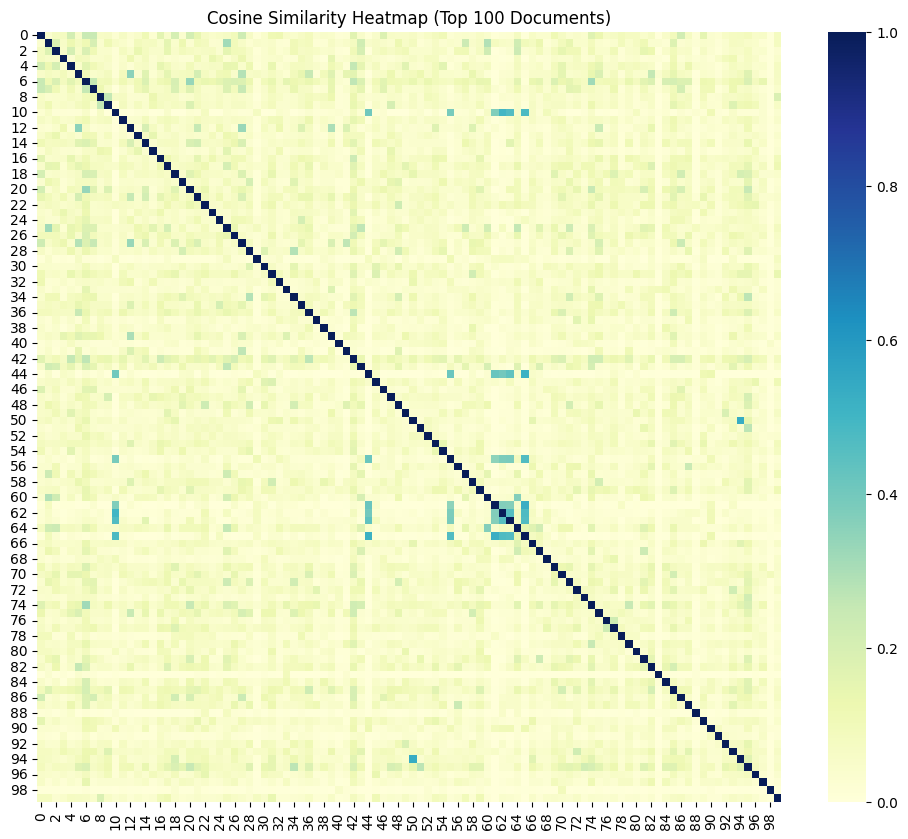

In [ ]:
# prompt: 유사도 분석을 하고 heatmap으로 상위 100개 문서만 시각화

# ... (previous code)

from sklearn.metrics.pairwise import cosine_similarity

# 코사인 유사도 계산
cosine_similarities = cosine_similarity(tfidf)

# 유사도 행렬을 DataFrame으로 변환
cosine_sim_df = pd.DataFrame(cosine_similarities, index=df.index, columns=df.index)

# 상위 100개 문서만 선택 (자기 자신 제외)
top_n = 100
top_indices = cosine_sim_df.apply(lambda x: x.nlargest(top_n + 1).index[1:], axis=1).values.tolist() #자기 자신 제외

# 시각화를 위한 데이터 준비
similarity_data = []
for i, indices in enumerate(top_indices):
    for j in indices:
      similarity_data.append([i, j, cosine_sim_df.loc[i, j]])

similarity_df = pd.DataFrame(similarity_data, columns=['doc1', 'doc2', 'similarity'])

# Heatmap 시각화 (상위 100개 문서만)
plt.figure(figsize=(12, 10))
heatmap_data = cosine_sim_df.iloc[:100, :100]  # 상위 100개 문서만 선택
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=False, fmt=".2f")  # annot=False로 숫자 표시 제거
plt.title("Cosine Similarity Heatmap (Top 100 Documents)")
plt.show()

In [ ]:
# prompt: 위에서 구한 유사도를 바탕으로 랜덤하게 5개 문서를 가져와서 각 문서와 유사도가 높은 문서 5개씩 유사도, Related Title	출력

import random

# 랜덤하게 5개 문서 선택
random_indices = random.sample(range(len(df)), 5)

for index in random_indices:
    # 현재 문서와의 유사도
    similarities = cosine_sim_df.iloc[index].sort_values(ascending=False)

    # 상위 5개 문서의 유사도와 제목 출력 (자기 자신 제외)
    print(f"\nDocument Index: {index}, Title: {df['Related Title'][index]}")
    top_5_similar = similarities[1:6] # 자기 자신 제외 상위 5개
    for similar_index, similarity_score in top_5_similar.items():
        print(f"  - Similarity: {similarity_score:.4f}, Related Title: {df['Related Title'][similar_index]}")


Document Index: 384, Title: C언어로 하드웨어를 합성할 수 있다고? HLS Design <b>Flow</b>
  - Similarity: 0.3635, Related Title: Design <b>flow</b> / Design setup
  - Similarity: 0.2064, Related Title: FSM &amp; DECODE &amp; COUNT
  - Similarity: 0.1924, Related Title: (HQTECH/자동화 <b>툴</b> 검증) HQTECH의 자동화 <b>툴</b> 검증을... 
  - Similarity: 0.1728, Related Title: 언택트 시대 4대 협업툴 본격 비교 분석! 플로우, 노션... 
  - Similarity: 0.1721, Related Title: 디지털시스템설계 2. Digital System Design <b>Flow</b>

Document Index: 587, Title: 슬랙 / 플로우 업무 협업 <b>툴</b> 알아볼까요?
  - Similarity: 0.2062, Related Title: 국내에서의 협업 툴은 슬랙일까 플로우일까
  - Similarity: 0.1785, Related Title: AI 업무 협업툴 플로우(<b>flow</b>), 슬랙(slack) <b>기능</b> 사용법 및... 
  - Similarity: 0.1739, Related Title: 회사 업무 진행에 딱 좋은 AI <b>툴</b> 사용 후기, 협업툴 추천 플로우
  - Similarity: 0.1689, Related Title: 언택트 시대의 트렌드 프로젝트 관리 <b>툴</b> 5종 &amp; 업무 협업 <b>툴</b> 5종
  - Similarity: 0.1664, Related Title: 코로나시대 직장에서 살아남기, 협업 툴이란?

Document Index: 355, Title: AI 협업툴 추천 플로우 3.0 NOW 메신저+업무비서 컨퍼런스 현장
  

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Keyword,Related Title,Content Summary,Combined Text,Combined Text Length
0,Flow툴 기능,"Slack 슬랙, <b>Flow</b> 플로우 업무 효율을 높이는 협업<b>툴 기능...",그런 점에서 오늘은 슬랙(Slack)과 플로우(<b>Flow</b>)라는 협업툴을 ...,"Slack 슬랙, Flow 플로우 업무 효율을 높이는 협업툴 기능 그런 점에서 오늘...",159
1,Flow툴 기능,생성형 AI 비서 적용 협업툴 플로우 <b>flow</b> 3.0 AI NOW...,지난 3월 7일(목) 여의도의 콘래드 호텔에서 개최되었던 <b>flow</b> 3....,생성형 AI 비서 적용 협업툴 플로우 flow 3.0 AI NOW... 지난 3월...,168
2,Flow툴 기능,"업무관리 AI 프로그램 협업툴, 인공지능 비서 플로우(<b>Flow</b>)",오늘은 업무관리에 필요한 ai 협업툴인 플로우(<b>Flow</b>)에 대해 알아보...,"업무관리 AI 프로그램 협업툴, 인공지능 비서 플로우(Flow) 오늘은 업무관리에 ...",153
3,Flow툴 기능,"협업툴 지라, <b>FLOW</b> 비교 분석",오늘은 협업툴 지라와 <b>FLOW</b>를 비교하는 컨텐츠를 포스팅하겠습니다. 개...,"협업툴 지라, FLOW 비교 분석 오늘은 협업툴 지라와 FLOW를 비교하는 컨텐츠를...",138
4,Flow툴 기능,"협업툴 플로우 <b>FLOW</b>, 업무 효율 생산성 향상 AI 프로그램 추천","그래서 그동안 여러 협업툴을 정말 많이 사용해 왔지만, 제가 사용한 플로우(<b>F...","협업툴 플로우 FLOW, 업무 효율 생산성 향상 AI 프로그램 추천 그래서 그동안 ...",158
...,...,...,...,...,...
995,Flow툴 기능,애자일 조직의 시작 - 노션(notion)템플릿과 플로우 활용하기,"두번째는 플로우(<b>flow</b>)입니다. 이 두가지 서비스를 쓰면서, 업무 관...",애자일 조직의 시작 - 노션(notion)템플릿과 플로우 활용하기 두번째는 플로우(...,177
996,Flow툴 기능,7월 8일,selection tool &lt; V &gt; : 선택/이동 <b>툴</b> ( ...,7월 8일 selection tool &lt; V &gt; : 선택/이동 툴 ( h...,174
997,Flow툴 기능,발멧플로우컨트롤 밸브 기술의 발전,Ville Kähkönen (Director) Renewable Energy and...,발멧플로우컨트롤 밸브 기술의 발전 Ville Kähkönen (Director) R...,213
998,Flow툴 기능,&quot;나만의 개발 생산성 높이는 비법&quot;,예시 Git <b>Flow</b> 전략: 저는 팀 프로젝트에서 Git <b>Flow...,&quot;나만의 개발 생산성 높이는 비법&quot; 예시 Git Flow 전략: ...,169


In [ ]:
# prompt: df['Combined Text']를  통해 5개로 군집화 하고 마지막 컬럼에 군집값을 넣어주고 각 군집별로 상위 키워드 20개와 가중치 출력, 각 군집에 할당된 데이터 수도 함께 표시

from sklearn.cluster import KMeans

# KMeans를 사용하여 5개의 군집으로 데이터를 군집화
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(tfidf)

# 각 군집별 상위 키워드 및 가중치 출력
for cluster_num in range(5):
    cluster_data = df[df['Cluster'] == cluster_num]['Combined Text']
    cluster_tfidf = vectorizer.transform(cluster_data)

    # 군집별 TF-IDF 벡터를 NMF에 적용하여 키워드 추출
    nmf_cluster = NMF(n_components=1, random_state=42)
    nmf_cluster.fit(cluster_tfidf)

    topic = nmf_cluster.components_[0]
    top_keywords_indices = topic.argsort()[:-21:-1]
    top_keywords = [(feature_names[i], topic[i]) for i in top_keywords_indices]

    print(f"Cluster {cluster_num}:")
    for keyword, weight in top_keywords:
        print(f"  - {keyword}: {weight:.3f}")
    print(f"  - Number of documents in this cluster: {len(cluster_data)}")
    print()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Cluster 0:
  - 플로우: 0.776
  - 업무: 0.724
  - ai: 0.551
  - 협업: 0.458
  - 메신저: 0.424
  - 협업툴: 0.418
  - flow: 0.378
  - 관리: 0.332
  - 프로젝트: 0.312
  - 업무용: 0.295
  - 기능이: 0.223
  - 있는: 0.190
  - 기능: 0.173
  - 기능을: 0.162
  - 올인원: 0.159
  - 업무관리: 0.157
  - 하나로: 0.148
  - 플로우는: 0.141
  - 기능과: 0.131
  - 추천: 0.131
  - Number of documents in this cluster: 140

Cluster 1:
  - 로지텍: 0.608
  - mx: 0.447
  - git: 0.417
  - 기능을: 0.399
  - 마우스: 0.364
  - flow: 0.342
  - 있는: 0.303
  - 통해: 0.265
  - 버티컬: 0.250
  - 다양한: 0.192
  - pc를: 0.180
  - 3대의: 0.169
  - 사용할: 0.162
  - 블루투스: 0.161
  - 있습니다: 0.149
  - 최대: 0.148
  - 기능: 0.146
  - 윈도우: 0.144
  - 무선: 0.131
  - 구글: 0.131
  - Number of documents in this cluster: 205

Cluster 2:
  - quot: 0.532
  - flow: 0.531
  - 기능: 0.501
  - chart: 0.269
  - 디자인: 0.204
  - user: 0.189
  - flow로: 0.186
  - gt: 0.182
  - 쉽게: 0.179
  - 일하기: 0.176
  - 위한: 0.173
  - 기능이: 0.166
  - 설계: 0.161
  - 새로운: 0.159
  - design: 0.152
  - 플로우: 0.150
  - 기능을: 0.150
  - ui: 0.144
  - ai: 

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


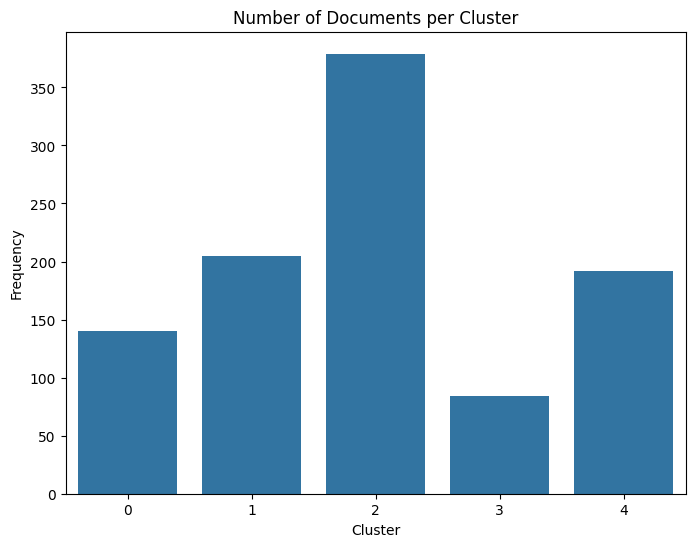

In [ ]:
# prompt: 각 군집별 빈도수 시각화

# 군집별 빈도수 계산
cluster_counts = df['Cluster'].value_counts()

# 막대 그래프 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values)
plt.title('Number of Documents per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# prompt: 0번 군집 데이터만 가져올 것

# 0번 군집 데이터만 추출
cluster_0_data = df[df['Cluster'] == 0]

# 결과 출력 (선택 사항)
cluster_0_data

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Keyword,Related Title,Content Summary,Combined Text,Combined Text Length,Cluster
1,Flow툴 기능,생성형 AI 비서 적용 협업툴 플로우 <b>flow</b> 3.0 AI NOW...,지난 3월 7일(목) 여의도의 콘래드 호텔에서 개최되었던 <b>flow</b> 3....,생성형 AI 비서 적용 협업툴 플로우 flow 3.0 AI NOW... 지난 3월...,168,0
2,Flow툴 기능,"업무관리 AI 프로그램 협업툴, 인공지능 비서 플로우(<b>Flow</b>)",오늘은 업무관리에 필요한 ai 협업툴인 플로우(<b>Flow</b>)에 대해 알아보...,"업무관리 AI 프로그램 협업툴, 인공지능 비서 플로우(Flow) 오늘은 업무관리에 ...",153,0
6,Flow툴 기능,"AI 업무 협업툴 플로우(<b>flow</b>), 슬랙(slack) <b>기능</b...",플로우(<b>flow</b>) 업무 협업툴 비용 업무 협업 <b>툴</b> 플로우(...,"AI 업무 협업툴 플로우(flow), 슬랙(slack) 기능 사용법 및... 플로...",168,0
14,Flow툴 기능,지라 &amp; 플로우 비교 / 업무 관리 AI 협업툴 Slack Jira <b>F...,실제로 나와 내가 속한 우리 팀은 <b>Flow</b>의 AI<b>기능</b>으로 ...,지라 &amp; 플로우 비교 / 업무 관리 AI 협업툴 Slack Jira Flow...,163,0
17,Flow툴 기능,협업툴 플로우(<b>Flow</b>) 총정리,플로우(<b>Flow</b>)에 대해 정리해 보려 해요. 플로우는 실시간 소통부터 ...,협업툴 플로우(Flow) 총정리 플로우(Flow)에 대해 정리해 보려 해요. 플로우...,136,0
...,...,...,...,...,...,...
817,Flow툴 기능,"아네스, AI로 업무 효율을 극대화하는 올인원 플랫폼 사용 후기","다음으로, 아네스의 큰 장점 중 하나인 플로우(<b>Flow</b>)에 대해 소개해...","아네스, AI로 업무 효율을 극대화하는 올인원 플랫폼 사용 후기 다음으로, 아네스의...",152,0
828,Flow툴 기능,"코로나시대 직장에서 살아남기, 협업 툴이란?","반면, 협업 툴의 경우 메신저나 화상 회의 등 특정 <b>기능</b>에 특화되어 있...","코로나시대 직장에서 살아남기, 협업 툴이란? 반면, 협업 툴의 경우 메신저나 화상 ...",144,0
843,Flow툴 기능,[웍스플로우 그룹웨어] 회사 업무 필수 <b>기능</b>이 한곳에...,"최근 재택근무가 활성화되면서 모바일 오피스, 원격근무 <b>기능</b>이 강화되는 ...",[웍스플로우 그룹웨어] 회사 업무 필수 기능이 한곳에... 최근 재택근무가 활성화...,159,0
975,Flow툴 기능,중소기업 협업 <b>툴</b> / 커뮤니케이션,"[출처] 비대면산업 박람회, Ontact Fair 2021 협업 <b>툴</b> '...","중소기업 협업 툴 / 커뮤니케이션 [출처] 비대면산업 박람회, Ontact Fair...",176,0


In [ ]:
df

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Keyword,Related Title,Content Summary,Combined Text,Combined Text Length,Cluster
0,Flow툴 기능,"Slack 슬랙, <b>Flow</b> 플로우 업무 효율을 높이는 협업<b>툴 기능...",그런 점에서 오늘은 슬랙(Slack)과 플로우(<b>Flow</b>)라는 협업툴을 ...,"Slack 슬랙, Flow 플로우 업무 효율을 높이는 협업툴 기능 그런 점에서 오늘...",159,4
1,Flow툴 기능,생성형 AI 비서 적용 협업툴 플로우 <b>flow</b> 3.0 AI NOW...,지난 3월 7일(목) 여의도의 콘래드 호텔에서 개최되었던 <b>flow</b> 3....,생성형 AI 비서 적용 협업툴 플로우 flow 3.0 AI NOW... 지난 3월...,168,0
2,Flow툴 기능,"업무관리 AI 프로그램 협업툴, 인공지능 비서 플로우(<b>Flow</b>)",오늘은 업무관리에 필요한 ai 협업툴인 플로우(<b>Flow</b>)에 대해 알아보...,"업무관리 AI 프로그램 협업툴, 인공지능 비서 플로우(Flow) 오늘은 업무관리에 ...",153,0
3,Flow툴 기능,"협업툴 지라, <b>FLOW</b> 비교 분석",오늘은 협업툴 지라와 <b>FLOW</b>를 비교하는 컨텐츠를 포스팅하겠습니다. 개...,"협업툴 지라, FLOW 비교 분석 오늘은 협업툴 지라와 FLOW를 비교하는 컨텐츠를...",138,4
4,Flow툴 기능,"협업툴 플로우 <b>FLOW</b>, 업무 효율 생산성 향상 AI 프로그램 추천","그래서 그동안 여러 협업툴을 정말 많이 사용해 왔지만, 제가 사용한 플로우(<b>F...","협업툴 플로우 FLOW, 업무 효율 생산성 향상 AI 프로그램 추천 그래서 그동안 ...",158,4
...,...,...,...,...,...,...
995,Flow툴 기능,애자일 조직의 시작 - 노션(notion)템플릿과 플로우 활용하기,"두번째는 플로우(<b>flow</b>)입니다. 이 두가지 서비스를 쓰면서, 업무 관...",애자일 조직의 시작 - 노션(notion)템플릿과 플로우 활용하기 두번째는 플로우(...,177,4
996,Flow툴 기능,7월 8일,selection tool &lt; V &gt; : 선택/이동 <b>툴</b> ( ...,7월 8일 selection tool &lt; V &gt; : 선택/이동 툴 ( h...,174,2
997,Flow툴 기능,발멧플로우컨트롤 밸브 기술의 발전,Ville Kähkönen (Director) Renewable Energy and...,발멧플로우컨트롤 밸브 기술의 발전 Ville Kähkönen (Director) R...,213,1
998,Flow툴 기능,&quot;나만의 개발 생산성 높이는 비법&quot;,예시 Git <b>Flow</b> 전략: 저는 팀 프로젝트에서 Git <b>Flow...,&quot;나만의 개발 생산성 높이는 비법&quot; 예시 Git Flow 전략: ...,169,1
